<a href="https://colab.research.google.com/github/AiswaryaGoriparthi/Aiswarya_INFO5731_Fall2024/blob/main/INFO5731_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re

# Function to load the dataset
def load_data(file_path):
    """
    Reads the dataset from a file and returns a DataFrame.
    """
    data = []
    labels = []
    with open(file_path, 'r') as file:
        for line in file:
            label, text = int(line[0]), line[2:].strip()  # Assumes label and text are space-separated
            labels.append(label)
            data.append(text)
    return pd.DataFrame({'text': data, 'label': labels})

# Preprocessing function for text data
def preprocess_text(text):
    """
    Cleans text by converting to lowercase and removing non-alphanumeric characters.
    """
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

# Load and preprocess the data
train_file = 'stsa-train.txt'
test_file = 'stsa-test.txt'

train_df = load_data(train_file)
test_df = load_data(test_file)

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_df['text'], train_df['label'], test_size=0.2, stratify=train_df['label'], random_state=42
)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_df['text'])

# Define classifiers
classifiers = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Perform cross-validation and training
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = {}

for name, model in classifiers.items():
    print(f"\nTraining {name}...")
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train_vec, y_train)  # Train the model
    y_val_pred = model.predict(X_val_vec)  # Predict on validation data
    # Store evaluation metrics
    results[name] = {
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred, average='weighted'),
        "Recall": recall_score(y_val, y_val_pred, average='weighted'),
        "F1-Score": f1_score(y_val, y_val_pred, average='weighted'),
        "CV Accuracy": np.mean(cv_scores)
    }

# Evaluate the models on the test set
test_results = {}
for name, model in classifiers.items():
    y_test_pred = model.predict(X_test_vec)
    test_results[name] = {
        "Accuracy": accuracy_score(test_df['label'], y_test_pred),
        "Precision": precision_score(test_df['label'], y_test_pred, average='weighted'),
        "Recall": recall_score(test_df['label'], y_test_pred, average='weighted'),
        "F1-Score": f1_score(test_df['label'], y_test_pred, average='weighted')
    }

# Print results
print("\nValidation Results:")
print(pd.DataFrame(results).T)

print("\nTest Results:")
print(pd.DataFrame(test_results).T)


Training MultinomialNB...

Training SVM...

Training KNN...

Training DecisionTree...

Training RandomForest...

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:13:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:13:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:13:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:13:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:13:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Validation Results:
               Accuracy  Precision    Recall  F1-Score  CV Accuracy
MultinomialNB  0.773844   0.774532  0.773844  0.773209     0.793346
SVM            0.764451   0.764376  0.764451  0.764253     0.784316
KNN            0.510116   0.521904  0.510116  0.493953     0.508314
DecisionTree   0.615607   0.616957  0.615607  0.615768     0.627160
RandomForest   0.708815   0.708625  0.708815  0.708586     0.707366
XGBoost        0.703035   0.705035  0.703035  0.700801     0.701400

Test Results:
               Accuracy  Precision    Recall  F1-Score
MultinomialNB  0.800110   0.801623  0.800110  0.799874
SVM            0.794069   0.794234  0.794069  0.794046
KNN            0.505766   0.506348  0.505766  0.487745
DecisionTree   0.635365   0.635418  0.635365  0.635342
RandomForest   0.723778   0.724687  0.723778  0.723522
XGBoost        0.708951   0.714084  0.708951  0.707258


In [ ]:
# Import necessary libraries
import numpy as np
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, TransformerMixin

# Define a custom transformer for Word2Vec
class Word2VecTransformer(BaseEstimator, TransformerMixin):
    """
    A custom transformer to generate Word2Vec embeddings for input text data.
    """
    def __init__(self, size=100, min_count=1, workers=4):
        self.size = size
        self.min_count = min_count
        self.workers = workers
        self.model = None

    def fit(self, X, y=None):
        """
        Train a Word2Vec model using the input text data.
        """
        # Split each document into words to prepare for Word2Vec
        sentences = [text.split() for text in X]
        # Train the Word2Vec model
        self.model = Word2Vec(sentences, vector_size=self.size, min_count=self.min_count, workers=self.workers)
        return self

    def transform(self, X):
        """
        Transform input text into document vectors using the trained Word2Vec model.
        """
        def document_vector(doc):
            # Generate a vector by averaging word vectors
            words = doc.split()
            return np.mean([self.model.wv[word] for word in words if word in self.model.wv] or [np.zeros(self.size)], axis=0)

        # Apply the transformation to all documents
        return np.array([document_vector(doc) for doc in X])

# Initialize and apply the Word2Vec transformer
w2v_transformer = Word2VecTransformer(size=100)
X_train_w2v = w2v_transformer.fit_transform(X_train)  # Train Word2Vec and transform training data
X_val_w2v = w2v_transformer.transform(X_val)         # Transform validation data
X_test_w2v = w2v_transformer.transform(test_df['text'])  # Transform test data

# Train a Random Forest Classifier using Word2Vec embeddings
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_w2v, y_train)

# Validation results
print("\nWord2Vec + Random Forest Validation Results:")
print("--------------------------------------------")
print(f"Accuracy:  {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_val, y_val_pred, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_val, y_val_pred, average='weighted'):.4f}")

# Test results
print("\nWord2Vec + Random Forest Test Results:")
print("--------------------------------------")
print(f"Accuracy:  {accuracy_score(test_df['label'], y_test_pred):.4f}")
print(f"Precision: {precision_score(test_df['label'], y_test_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(test_df['label'], y_test_pred, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(test_df['label'], y_test_pred, average='weighted'):.4f}")




Word2Vec + Random Forest Validation Results:
--------------------------------------------
Accuracy:  0.7030
Precision: 0.7050
Recall:    0.7030
F1-Score:  0.7008

Word2Vec + Random Forest Test Results:
--------------------------------------
Accuracy:  0.7090
Precision: 0.7141
Recall:    0.7090
F1-Score:  0.7073


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.metrics import classification_report

# Set the device (GPU if available, otherwise use CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Custom Dataset for BERT input
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]
        encoded = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoded['input_ids'].squeeze(0),
            'attention_mask': encoded['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Initialize tokenizer and datasets
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
max_length = 128

train_dataset = SentimentDataset(list(X_train), list(y_train), tokenizer, max_length)
val_dataset = SentimentDataset(list(X_val), list(y_val), tokenizer, max_length)
test_dataset = SentimentDataset(list(test_df['text']), list(test_df['label']), tokenizer, max_length)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load the BERT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

# Set up optimizer and loss function
optimizer = torch.optim.Adam(params=model.parameters(), lr=2e-5)
loss_function = torch.nn.CrossEntropyLoss()

# Training phase
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Validation phase
model.eval()
val_predictions, val_true_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        val_predictions.extend(predictions.cpu().numpy())
        val_true_labels.extend(labels.cpu().numpy())

print("\nValidation Results:")
print(classification_report(val_true_labels, val_predictions, target_names=["Negative", "Positive"]))

# Test phase
test_predictions, test_true_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        test_predictions.extend(predictions.cpu().numpy())
        test_true_labels.extend(labels.cpu().numpy())

print("\nTest Results:")
print(classification_report(test_true_labels, test_predictions, target_names=["Negative", "Positive"]))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Validation Results:
              precision    recall  f1-score   support

    Negative       0.87      0.95      0.91       662
    Positive       0.95      0.88      0.91       722

    accuracy                           0.91      1384
   macro avg       0.91      0.91      0.91      1384
weighted avg       0.91      0.91      0.91      1384


Test Results:
              precision    recall  f1-score   support

    Negative       0.88      0.93      0.91       912
    Positive       0.93      0.87      0.90       909

    accuracy                           0.90      1821
   macro avg       0.90      0.90      0.90      1821
weighted avg       0.90      0.90      0.90      1821



In [ ]:
from gensim.downloader import load

# Load a smaller pre-trained model available in gensim (e.g., 'glove-wiki-gigaword-50')
word2vec_model = load('glove-wiki-gigaword-50')  # This model is smaller and quicker to load

import pandas as pd
from gensim.downloader import load
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
import torch
from torch.utils.data import DataLoader, TensorDataset

# Function to read the dataset and sample it if needed
def read_and_sample_data(file_path, sample_size=None):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(" ", 1)
            if len(parts) == 2:
                label, text = parts
                if label.isdigit():
                    data.append((text, int(label)))
    dataset = pd.DataFrame(data, columns=['text', 'label'])
    if sample_size:
        dataset = dataset.sample(n=sample_size, random_state=42)
    return dataset

# Load the training and testing datasets
training_data = read_and_sample_data('stsa-train.txt', sample_size=500)
testing_data = read_and_sample_data('stsa-test.txt', sample_size=200)
train_texts, train_labels = training_data['text'], training_data['label']
test_texts, test_labels = testing_data['text'], testing_data['label']

### Word2Vec Approach ###

# Load a pre-trained Word2Vec model from gensim
word2vec = load('glove-wiki-gigaword-50')

# Function to create sentence embeddings using Word2Vec
def generate_word2vec_embeddings(sentences, model):
    sentence_embeddings = []
    for sentence in sentences:
        words = sentence.split()
        word_embeddings = [model[word] for word in words if word in model]
        if word_embeddings:
            sentence_embedding = sum(word_embeddings) / len(word_embeddings)
        else:
            sentence_embedding = [0] * model.vector_size
        sentence_embeddings.append(sentence_embedding)
    return sentence_embeddings

# Generate Word2Vec embeddings for training and testing
train_embeddings_w2v = generate_word2vec_embeddings(train_texts, word2vec)
test_embeddings_w2v = generate_word2vec_embeddings(test_texts, word2vec)

# Train a logistic regression model on Word2Vec embeddings
w2v_model = LogisticRegression(max_iter=100)
w2v_model.fit(train_embeddings_w2v, train_labels)
w2v_predictions = w2v_model.predict(test_embeddings_w2v)

# Evaluate the Word2Vec model
evaluation_results = {
    'Word2Vec': {
        "Accuracy": accuracy_score(test_labels, w2v_predictions),
        "Recall": recall_score(test_labels, w2v_predictions),
        "Precision": precision_score(test_labels, w2v_predictions),
        "F1 Score": f1_score(test_labels, w2v_predictions)
    }
}

### BERT Approach ###

# Initialize the BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to create BERT embeddings
def generate_bert_embeddings(sentences, tokenizer, model, max_len=128):
    input_ids, attention_masks = [], []

    for sentence in sentences:
        encoded = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)
        cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # Extract [CLS] token embeddings

    return cls_embeddings

# Generate BERT embeddings for training and testing
train_embeddings_bert = generate_bert_embeddings(train_texts, bert_tokenizer, bert_model)
test_embeddings_bert = generate_bert_embeddings(test_texts, bert_tokenizer, bert_model)

# Train a logistic regression model on BERT embeddings
bert_model_classifier = LogisticRegression(max_iter=100)
bert_model_classifier.fit(train_embeddings_bert, train_labels)
bert_predictions = bert_model_classifier.predict(test_embeddings_bert)

# Evaluate the BERT model
evaluation_results['BERT'] = {
    "Accuracy": accuracy_score(test_labels, bert_predictions),
    "Recall": recall_score(test_labels, bert_predictions),
    "Precision": precision_score(test_labels, bert_predictions),
    "F1 Score": f1_score(test_labels, bert_predictions)
}

# Display the evaluation results for Word2Vec and BERT models
for method_name, metrics in evaluation_results.items():
    print(f"{method_name} Model Results:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")
    print("\n")


[==================================================] 100.0% 66.0/66.0MB downloaded
Word2Vec Model Results:
  Accuracy: 0.755
  Recall: 0.7307692307692307
  Precision: 0.7835051546391752
  F1 Score: 0.7562189054726368


BERT Model Results:
  Accuracy: 0.835
  Recall: 0.8365384615384616
  Precision: 0.8446601941747572
  F1 Score: 0.8405797101449275




##**Question 2 (20 Points)**
The purpose of the question is to practice different machine learning algorithms for text clustering.

Please downlad the dataset by using the following link. https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones (You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**


*   K-means

*   DBSCAN

*   Hierarchical clustering
*   Word2Vec


*   BERT

You can refer to of the codes from the follwing link below. https://www.kaggle.com/karthik3890/text-clustering

K-means Silhouette Score: 0.040512292116274426
DBSCAN Silhouette Score: 0.18520553362789438
Hierarchical Clustering Silhouette Score: 0.028340375844785697
Word2Vec K-means Silhouette Score: 0.5299536836354198
BERT K-means Silhouette Score: 0.10397091507911682


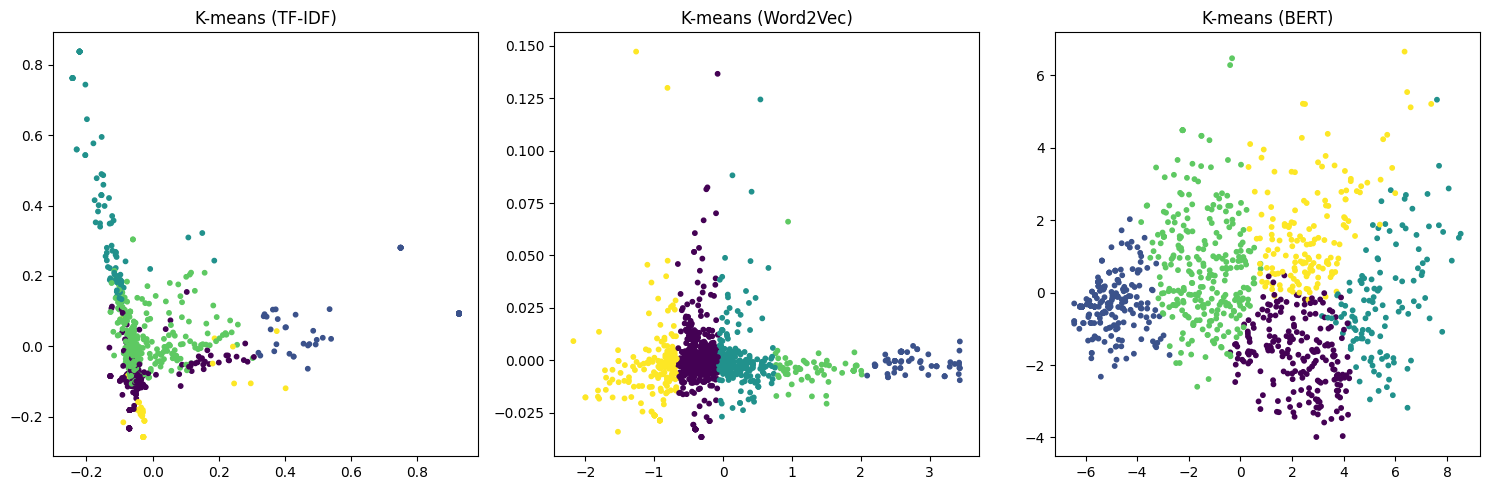

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to load and clean data in chunks
def load_and_clean_data(file_path, column_name, chunksize=10000):
    data_segments = []
    try:
        for chunk in pd.read_csv(file_path, usecols=[column_name], chunksize=chunksize, on_bad_lines='skip', engine='python'):
            clean_chunk = chunk.dropna(subset=[column_name])
            data_segments.append(clean_chunk)
    except Exception as e:
        print(f"Error reading file: {e}")
    return pd.concat(data_segments, ignore_index=True)

# Function for silhouette calculation and clustering
def perform_clustering(data, method, **kwargs):
    cluster_model = method(**kwargs)
    labels = cluster_model.fit_predict(data)
    valid_labels = labels != -1
    silhouette = silhouette_score(data[valid_labels], labels[valid_labels]) if np.any(valid_labels) else -1
    return labels, silhouette

# Load and preprocess the dataset
file_path = '/content/Amazon_Unlocked_Mobile.csv'
dataset = load_and_clean_data(file_path, 'Reviews')
dataset = dataset.sample(n=1000, random_state=42)  # Randomly sample for efficiency

# Text preprocessing
dataset['cleaned_reviews'] = dataset['Reviews'].str.lower().str.replace('[^a-zA-Z]', ' ', regex=True)

# Generate TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['cleaned_reviews'])

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)
kmeans_silhouette = silhouette_score(tfidf_matrix, kmeans_labels)
print(f"K-means Silhouette Score: {kmeans_silhouette}")

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(tfidf_matrix)
valid_labels = dbscan_labels != -1
dbscan_silhouette = silhouette_score(tfidf_matrix[valid_labels], dbscan_labels[valid_labels]) if np.any(valid_labels) else -1
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# Hierarchical clustering
non_zero_indices = tfidf_matrix.toarray().sum(axis=1) != 0
filtered_tfidf = tfidf_matrix[non_zero_indices]
hierarchical_labels, hierarchical_silhouette = perform_clustering(
    filtered_tfidf.toarray(),
    AgglomerativeClustering,
    n_clusters=5,
    metric='cosine',
    linkage='average'
)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

# Word2Vec embedding and clustering
tokenized_reviews = dataset['cleaned_reviews'].str.split()
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

def compute_sentence_embedding(sentence, model):
    vectors = [model.wv[word] for word in sentence.split() if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

word2vec_embeddings = np.array([compute_sentence_embedding(review, word2vec_model) for review in dataset['cleaned_reviews']])
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
word2vec_labels = kmeans_word2vec.fit_predict(word2vec_embeddings)
word2vec_silhouette = silhouette_score(word2vec_embeddings, word2vec_labels)
print(f"Word2Vec K-means Silhouette Score: {word2vec_silhouette}")

# BERT embedding and clustering
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def compute_bert_embeddings(sentences, tokenizer, model, max_length=128):
    inputs, masks = [], []
    for text in sentences:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        inputs.append(encoded['input_ids'])
        masks.append(encoded['attention_mask'])
    inputs = torch.cat(inputs, dim=0)
    masks = torch.cat(masks, dim=0)
    with torch.no_grad():
        outputs = model(inputs, attention_mask=masks)
    return outputs.last_hidden_state[:, 0, :].numpy()

bert_embeddings = compute_bert_embeddings(dataset['cleaned_reviews'], bert_tokenizer, bert_model)
kmeans_bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_embeddings)
bert_silhouette = silhouette_score(bert_embeddings, bert_labels)
print(f"BERT K-means Silhouette Score: {bert_silhouette}")

# Visualization using PCA
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())
word2vec_2d = pca.fit_transform(word2vec_embeddings)
bert_2d = pca.fit_transform(bert_embeddings)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("K-means (TF-IDF)")

plt.subplot(1, 3, 2)
plt.scatter(word2vec_2d[:, 0], word2vec_2d[:, 1], c=word2vec_labels, cmap='viridis', s=10)
plt.title("K-means (Word2Vec)")

plt.subplot(1, 3, 3)
plt.scatter(bert_2d[:, 0], bert_2d[:, 1], c=bert_labels, cmap='viridis', s=10)
plt.title("K-means (BERT)")

plt.tight_layout()
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.
K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT-based clustering all produce different outcomes in terms of cluster cohesion, distribution, and text semantic importance. Centroid-based K-means produces reasonably clean but possibly too broad clusters; it works well with TF-IDF vectors but may have trouble with non-spherical clusters in text data. Although DBSCAN does not require a predetermined number of clusters and is sensitive to noise due to its density-based architecture, it may not be able to properly cluster sparse text input, frequently leaving many points unclustered. Applying hierarchical clustering, which arranges data in a tree-like form, to TF-IDF vectors may result in inconsistent clusters because of the high-dimensional sparsity of the data, but it can also capture nested correlations.In contrast to TF-IDF-based techniques, Word2Vec enhances clustering relevance by capturing word associations through word embeddings, producing more semantically relevant clusters. This is further enhanced by BERT embeddings, which capture contextual meaning in phrases to produce highly cohesive and semantically correct clusters that are better able to understand complicated relationships in text data. Generally speaking, BERT-based clustering provides the most reliable results for text data, particularly in situations where semantic comprehension is crucial.
.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
The opportunity to compare various clustering techniques on text data, including K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT,
made this task enlightening. DBSCAN and K-means performed well, although they had trouble understanding intricate textual associations.
Although hierarchical clustering provided a useful visual framework, it performed less well with high-dimensional data. BERT provided even more
contextually aware and relevant clusters, whereas Word2Vec embeddings enhanced clustering by capturing word associations. BERT-based clustering
outperformed other methods overall, emphasizing how crucial embeddings are when working with text data. This task gave participants invaluable
hands-on experience selecting suitable clustering methods for various kinds of textual data.
'''